Baseline Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



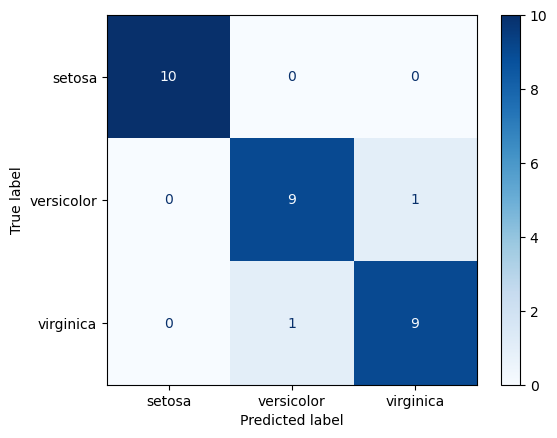

In [2]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1. Load Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# For simplicity, use only two features for visualisation purposes (petal length and petal width)
X = X[:, 2:4]

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Train Baseline KNN Model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 5. Evaluate Baseline Model
print("Baseline Model Performance:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names).plot(cmap='Blues')
plt.show()



Best K found through Grid Search: 4
Tuned Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



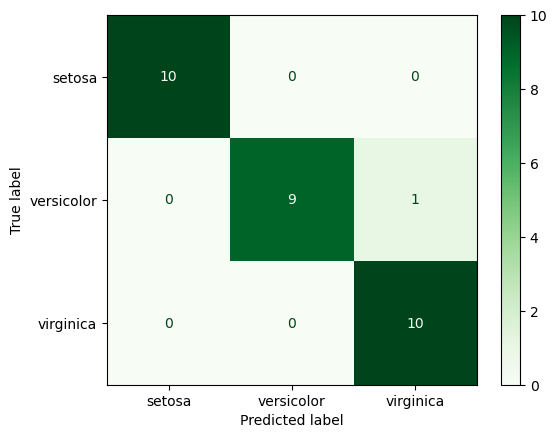

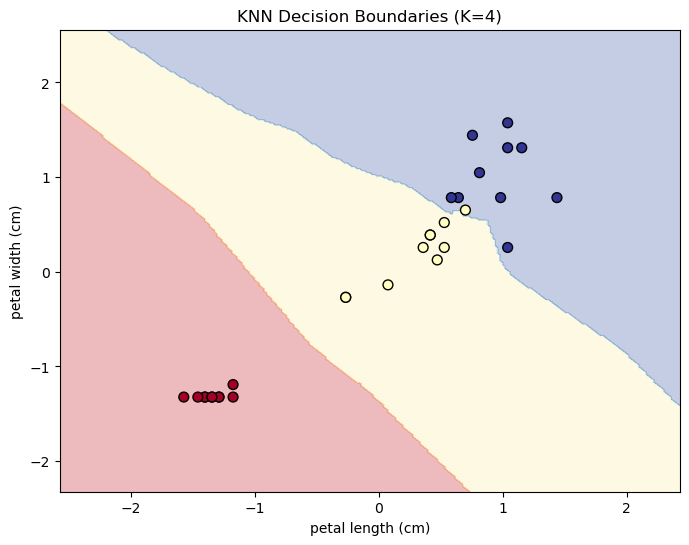

In [3]:
# 6. Hyperparameter Tuning with GridSearchCV to Find Optimal K
param_grid = {'n_neighbors': np.arange(1, 11)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best K Value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best K found through Grid Search: {best_k}")

# 7. Train and Evaluate Tuned KNN Model
knn_tuned = KNeighborsClassifier(n_neighbors=best_k)
knn_tuned.fit(X_train, y_train)
y_pred_tuned = knn_tuned.predict(X_test)

print("Tuned Model Performance:")
print(classification_report(y_test, y_pred_tuned))
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned, display_labels=target_names).plot(cmap='Greens')
plt.show()

# 8. Visualisation of Decision Boundaries
def plot_decision_boundaries(X, y, model, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.RdYlBu)
    plt.xlabel(feature_names[2])
    plt.ylabel(feature_names[3])
    plt.title(title)
    plt.show()

# Plot Decision Boundaries for Tuned Model
plot_decision_boundaries(X_test, y_test, knn_tuned, f"KNN Decision Boundaries (K={best_k})")
